In [401]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [402]:
import warnings

warnings.filterwarnings('ignore')

In [403]:
array = []
directory = r'.\persampel\lele'
temp = pd.DataFrame()
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        array = os.path.join(directory, filename)
        df = pd.read_csv(array).assign(kelas=filename.split('.')[0])
        tes = df.loc[df['Proses'] == 'P2']
        sth = temp.append(tes, ignore_index=True)
        temp = sth
print(temp)

     Proses  MQ3  MQ4  MQ5  MQ8  MQ9  MQ135  kelas
0        P2  346  355  101  257  102    338    L 0
1        P2  329  368  107  269   94    321    L 0
2        P2  350  357   93  265  106    340    L 0
3        P2  341  376  102  260   97    340    L 0
4        P2  359  375   96  255   98    350    L 0
...     ...  ...  ...  ...  ...  ...    ...    ...
5395     P2  410  396  126  277  135    368  L 7,5
5396     P2  425  395  129  290  135    361  L 7,5
5397     P2  408  388  127  290  141    373  L 7,5
5398     P2  415  393  132  286  139    372  L 7,5
5399     P2  410  382  125  290  135    363  L 7,5

[5400 rows x 8 columns]


In [404]:
temp.shape

(5400, 8)

In [405]:
temp.tail()

,Proses,MQ3,MQ4,MQ5,MQ8,MQ9,MQ135,kelas
5395,P2,410,396,126,277,135,368,"L 7,5"
5396,P2,425,395,129,290,135,361,"L 7,5"
5397,P2,408,388,127,290,141,373,"L 7,5"
5398,P2,415,393,132,286,139,372,"L 7,5"
5399,P2,410,382,125,290,135,363,"L 7,5"


In [406]:
temp = temp[ temp['MQ135'].apply(lambda x: x >300)]
temp = temp[ temp['MQ3'].apply(lambda x: x >300)]
temp = temp[ temp['MQ4'].apply(lambda x: x >350)]
temp = temp[ temp['MQ5'].apply(lambda x: x >83)]
temp = temp[ temp['MQ8'].apply(lambda x: x >250)]
temp = temp[ temp['MQ9'].apply(lambda x: x >94)]

In [407]:
temp.shape

(3645, 8)

In [408]:
temp.head()

,Proses,MQ3,MQ4,MQ5,MQ8,MQ9,MQ135,kelas
0,P2,346,355,101,257,102,338,L 0
2,P2,350,357,93,265,106,340,L 0
3,P2,341,376,102,260,97,340,L 0
4,P2,359,375,96,255,98,350,L 0
5,P2,346,356,97,274,96,320,L 0


In [409]:
temp.tail()

,Proses,MQ3,MQ4,MQ5,MQ8,MQ9,MQ135,kelas
5395,P2,410,396,126,277,135,368,"L 7,5"
5396,P2,425,395,129,290,135,361,"L 7,5"
5397,P2,408,388,127,290,141,373,"L 7,5"
5398,P2,415,393,132,286,139,372,"L 7,5"
5399,P2,410,382,125,290,135,363,"L 7,5"


In [410]:
col_names = df.columns

col_names

Index(['Proses', 'MQ3', 'MQ4', 'MQ5', 'MQ8', 'MQ9', 'MQ135', 'kelas'], dtype='object')

In [411]:
df.columns = df.columns.str.strip()

In [412]:
temp.columns

Index(['Proses', 'MQ3', 'MQ4', 'MQ5', 'MQ8', 'MQ9', 'MQ135', 'kelas'], dtype='object')

<AxesSubplot:>

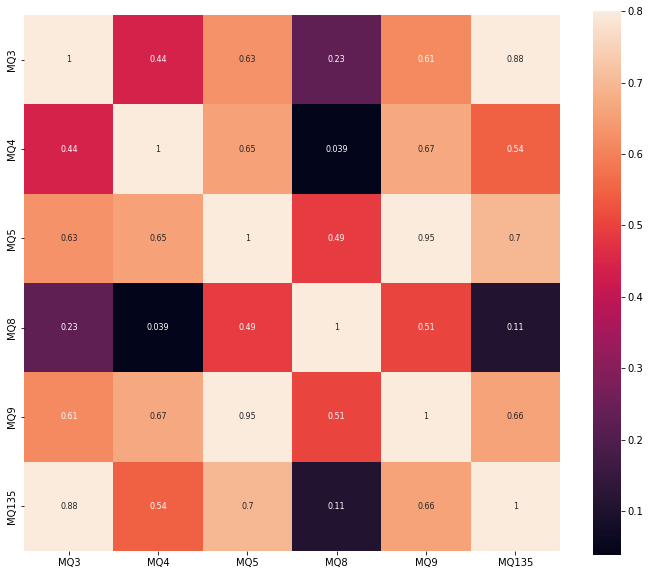

In [413]:
corrmat = temp.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,annot_kws={'size':8})

In [414]:
# Extract Sensor
Sensor = ['MQ3', 'MQ4', 'MQ5', 'MQ8', 'MQ9', 'MQ135']
X = temp.loc[:, Sensor ].values

# Extract target fish
y = temp.loc[:, ['kelas']].values

In [415]:
X

array([[346, 355, 101, 257, 102, 338],
       [350, 357,  93, 265, 106, 340],
       [341, 376, 102, 260,  97, 340],
       ...,
       [408, 388, 127, 290, 141, 373],
       [415, 393, 132, 286, 139, 372],
       [410, 382, 125, 290, 135, 363]], dtype=int64)

In [416]:
y

array([['L 0'],
       ['L 0'],
       ['L 0'],
       ...,
       ['L 7,5'],
       ['L 7,5'],
       ['L 7,5']], dtype=object)

In [417]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [418]:
X_train.shape, X_test.shape

((2916, 6), (729, 6))

In [419]:
X_train, y_train

(array([[342, 381,  90, 263,  96, 333],
        [341, 370,  94, 272,  96, 321],
        [341, 368,  93, 273,  98, 320],
        ...,
        [351, 354,  86, 279, 105, 330],
        [346, 369,  90, 273, 101, 350],
        [353, 379,  92, 275,  99, 345]], dtype=int64),
 array([['L 2,5'],
        ['L 2,5'],
        ['L 2,5'],
        ...,
        ['L 2,5'],
        ['L 5'],
        ['L 5']], dtype=object))

In [420]:
X = pd.DataFrame(X_train)
X.describe()

,0,1,2,3,4,5
count,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000
mean,393.698560,375.824417,103.188957,273.686214,116.735254,353.325789
std,48.266563,14.312394,18.548836,9.988499,21.303698,24.408758
min,316.000000,352.000000,84.000000,251.000000,95.000000,310.000000
25%,349.000000,364.000000,89.000000,265.000000,101.000000,333.000000
50%,376.000000,376.000000,96.000000,273.000000,108.000000,356.000000
75%,439.000000,385.000000,119.000000,281.000000,127.250000,373.000000
max,510.000000,435.000000,174.000000,308.000000,192.000000,567.000000


In [421]:
cols = X.columns

In [422]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
#svc=SVC() 

# fit classifier to training set
#svc.fit(X_train,y_train)

# make predictions on test set
#y_pred=svc.predict(X_test)

# compute and print accuracy score
#print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [423]:
# instantiate classifier with rbf kernel and C=100
#svc=SVC(C=100.0) 

# fit classifier to training set
#svc.fit(X_train,y_train)

# make predictions on test set
#y_pred=svc.predict(X_test)

# compute and print accuracy score
#print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [424]:
# instantiate classifier with rbf kernel and C=...
#svc=SVC(C=1000000.0) 

# fit classifier to training set
#svc.fit(X_train,y_train)

# make predictions on test set
#y_pred_test=svc.predict(X_test)

# compute and print accuracy score
#print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [425]:
# instantiate classifier with linear kernel and C=1.0
#linear_svc=SVC(kernel='poly', C=10000.0, verbose=True) 


# fit classifier to training set
#linear_svc.fit(X_train,y_train)

# make predictions on test set
#y_pred_test=linear_svc.predict(X_test)

# compute and print accuracy score
#print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

In [426]:
# instantiate classifier with linear kernel and C=100.0
#linear_svc100=SVC(kernel='poly', C=100000.0)
svc=SVC(kernel ='rbf',C=100.0,) 
#linear_svc100=SVC(kernel='poly', C=100000.0)

# fit classifier to training set
svc.fit(X_train, y_train)

# make predictions on test set
y_pred_test=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=100.0 : 0.9396


In [427]:
# instantiate classifier with linear kernel and C=1000.0
#linear_svc1000=SVC(kernel='linear', C=100.0)


# fit classifier to training set
#linear_svc1000.fit(X_train, y_train)


# make predictions on test set
#y_pred_test=linear_svc1000.predict(X_test)


# compute and print accuracy score
#print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [428]:
y_pred_train = svc.predict(X_train)

y_pred_train

array(['L 0', 'L 2,5', 'L 2,5', ..., 'L 5', 'L 5', 'L 5'], dtype=object)

In [429]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9259


In [430]:
#print('Training set score: {:.4f}'.format(linear_svc100.score(X_train, y_train)))
#print('Test set score: {:.4f}'.format(linear_svc100.score(X_test, y_test)))

In [431]:
print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 0.9259
Test set score: 0.9396


In [432]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[101   0   4  11   0]
 [  0 195   0   0   0]
 [  5   0  55  19   0]
 [  4   0   1 157   0]
 [  0   0   0   0 177]]

True Positives(TP) =  101

True Negatives(TN) =  195

False Positives(FP) =  0

False Negatives(FN) =  0


<Figure size 138240x77760 with 0 Axes>

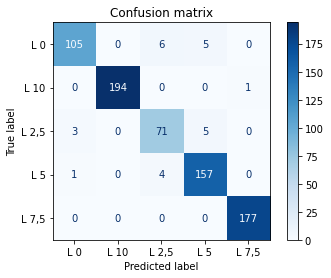

In [433]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

plt.figure(figsize=(1920,1080))
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.show()

In [434]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         L 0       0.92      0.87      0.89       116
        L 10       1.00      1.00      1.00       195
       L 2,5       0.92      0.70      0.79        79
         L 5       0.84      0.97      0.90       162
       L 7,5       1.00      1.00      1.00       177

    accuracy                           0.94       729
   macro avg       0.93      0.91      0.92       729
weighted avg       0.94      0.94      0.94       729

